Эркенова Джамиля, 15.11Д-ПМ03/19б

Творческая работа

# Классификация музыкальных жанров

Загрузим все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

Прочитаем файл "features_3_sec.csvv" в переменную df

In [2]:
df = pd.read_csv('/features_3_sec.csv')

Изучим датасет. В нем даны характеристики 3-х секунд песен в различных жанрах. Выведем первые 5 строк датасета

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

Проверим датасет на наличие пропущенных значений

In [5]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

Определим уникальные значения музыкальных жанров

In [6]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Вычислим количество объектов каждого вида

In [7]:
df['label'].value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

Определим статистические характеристики признаков

In [8]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


Определим статистические характеристики каждого жанра

In [9]:
for element in ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']:
  print(element)
  elementt = df[df['label'] == element]
  print(elementt.describe())


blues
        length  chroma_stft_mean  chroma_stft_var     rms_mean      rms_var  \
count   1000.0       1000.000000      1000.000000  1000.000000  1000.000000   
mean   66149.0          0.342438         0.089851     0.136025     0.002624   
std        0.0          0.065894         0.007917     0.055486     0.002243   
min    66149.0          0.199890         0.064627     0.019789     0.000096   
25%    66149.0          0.291327         0.084083     0.095647     0.001013   
50%    66149.0          0.339325         0.089765     0.126333     0.002129   
75%    66149.0          0.395060         0.095410     0.168052     0.003534   
max    66149.0          0.508660         0.120964     0.309907     0.026089   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             1000.000000           1.000000e+03              1000.000000   
mean              1726.067889           2.455982e+05              1930.849650   
std                554.577835          

Построим диаграммы размаха признаков по кадому жанру

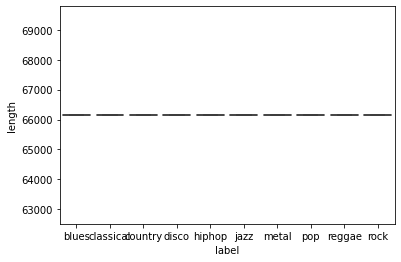

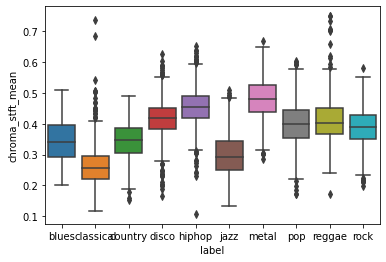

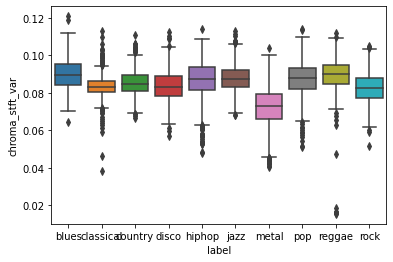

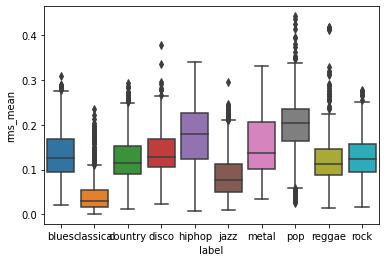

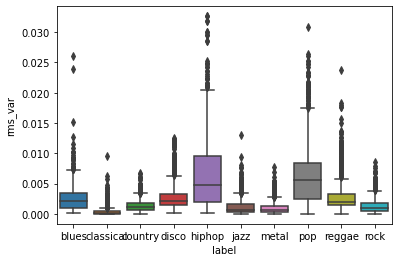

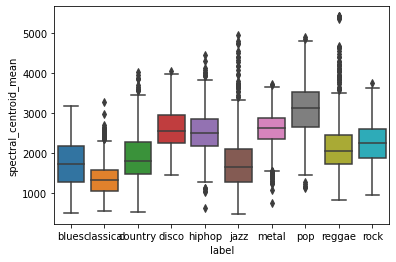

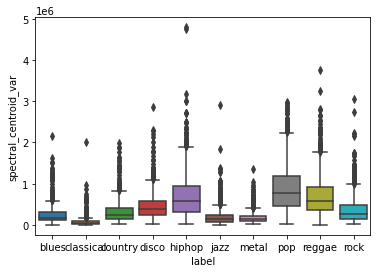

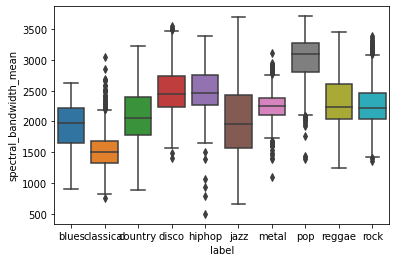

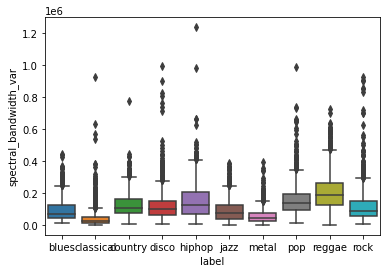

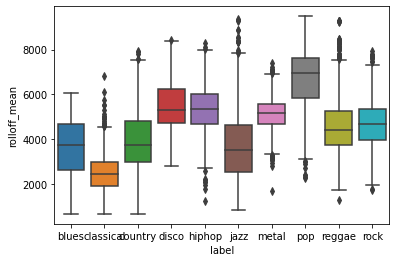

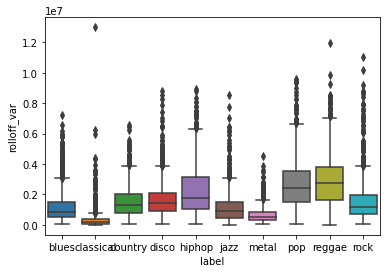

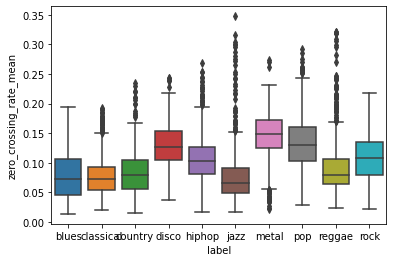

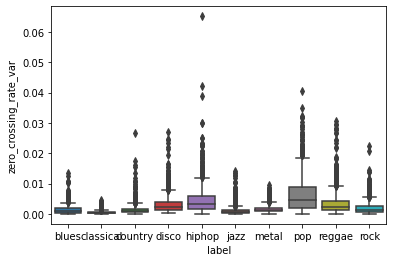

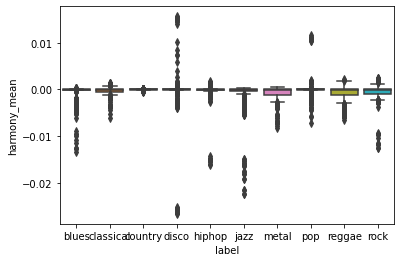

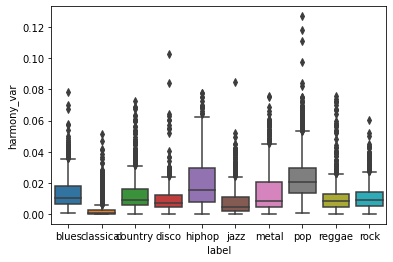

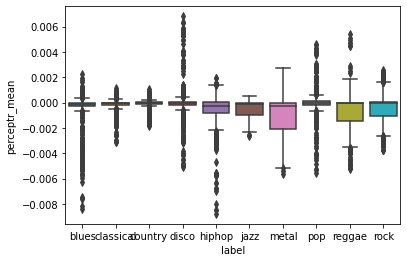

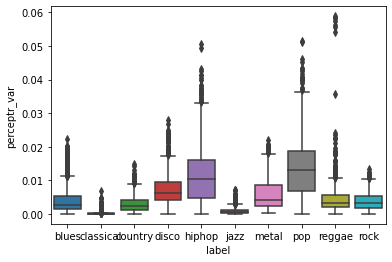

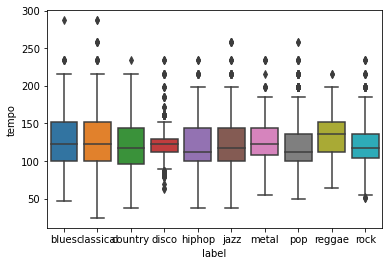

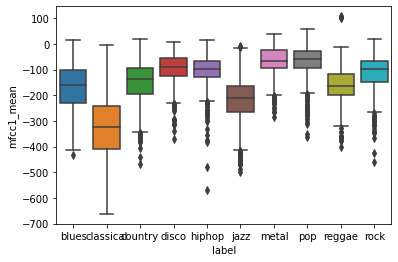

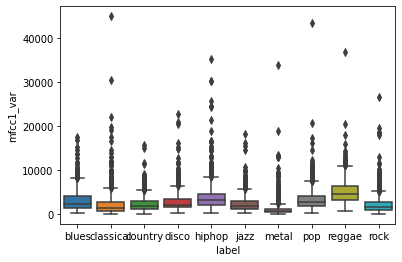

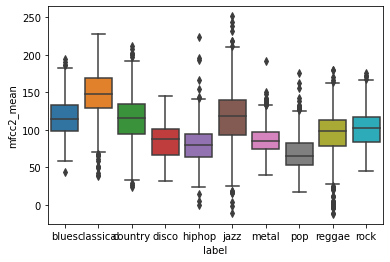

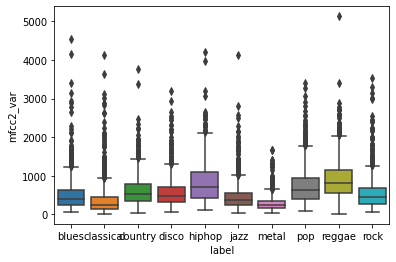

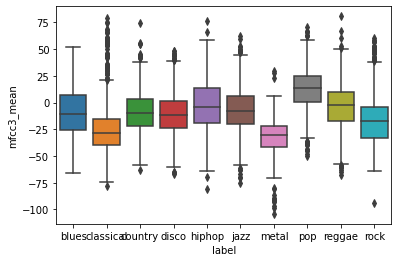

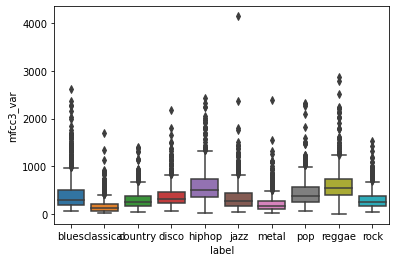

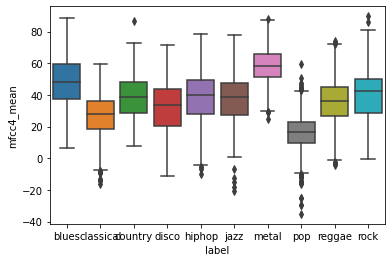

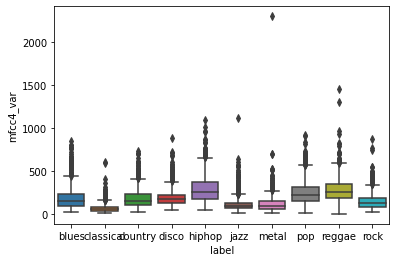

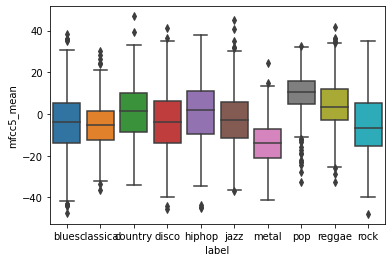

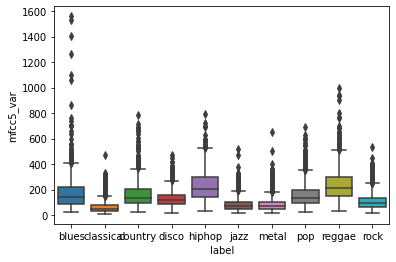

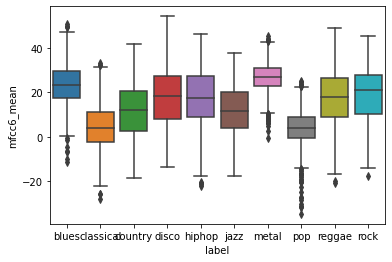

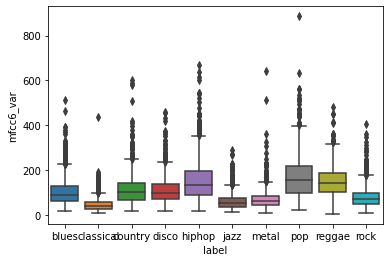

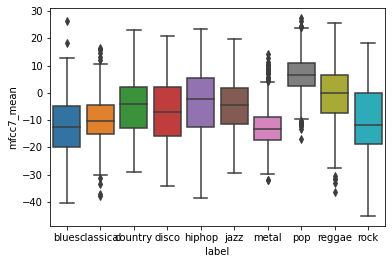

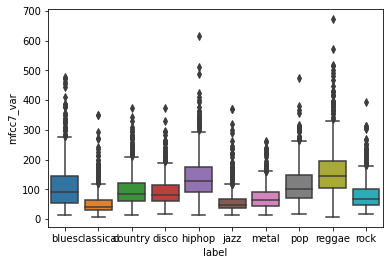

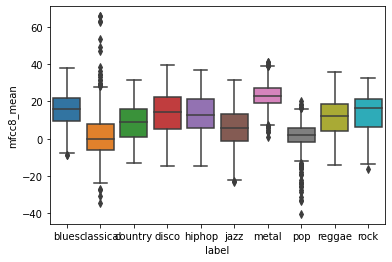

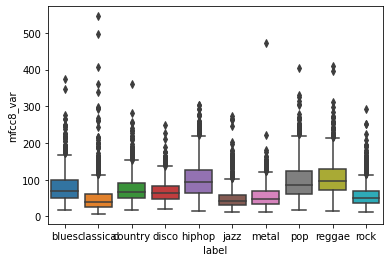

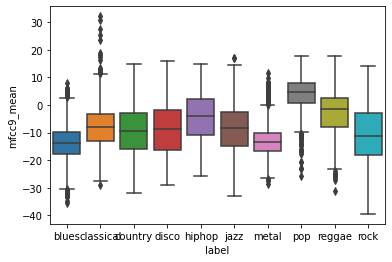

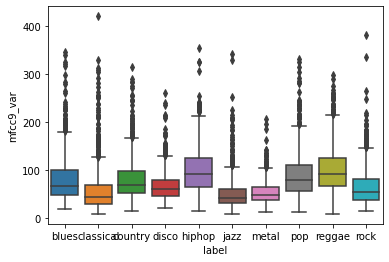

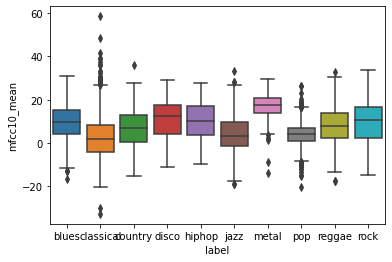

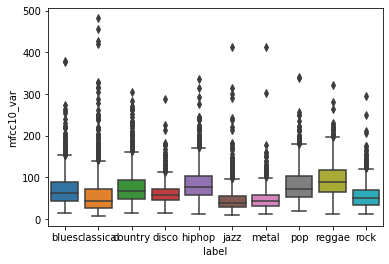

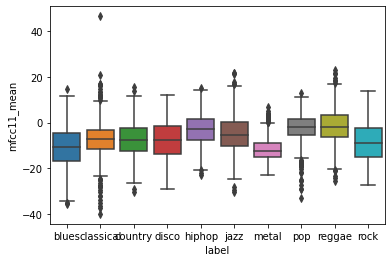

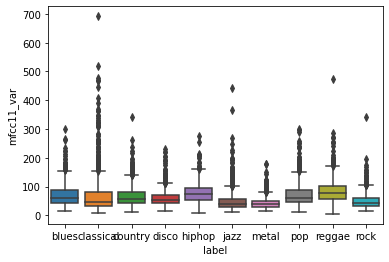

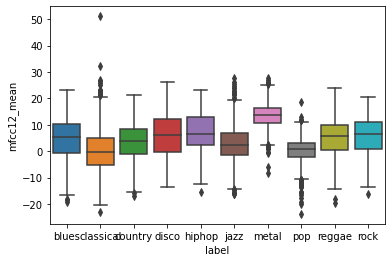

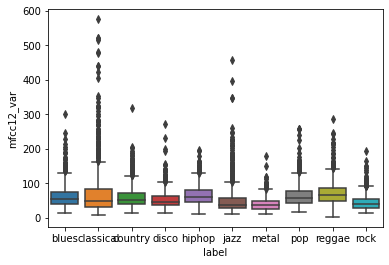

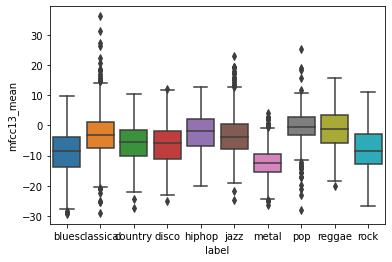

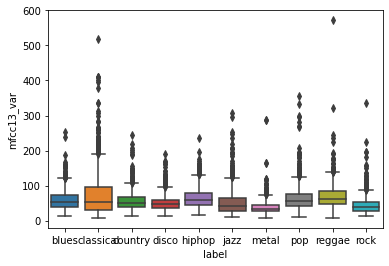

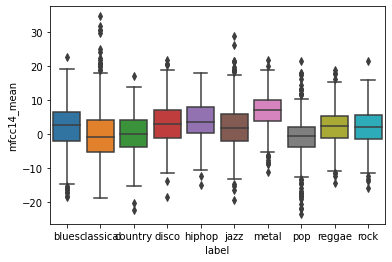

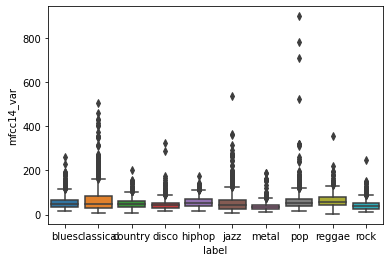

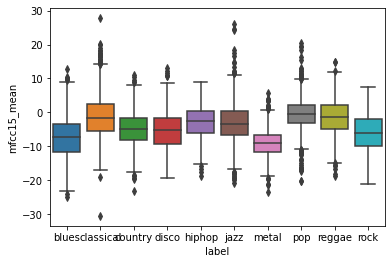

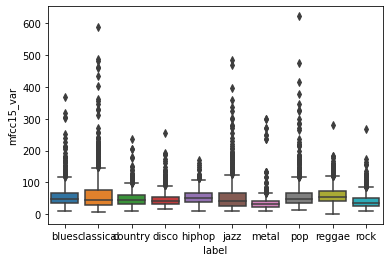

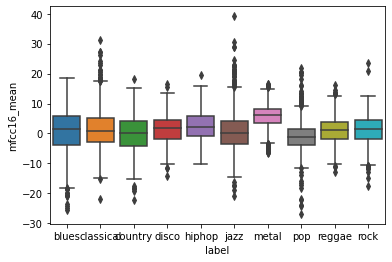

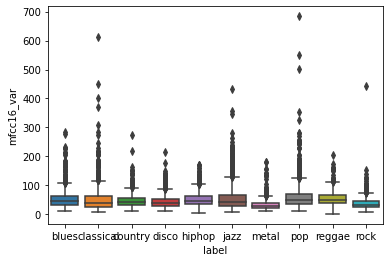

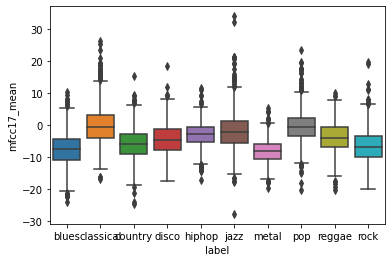

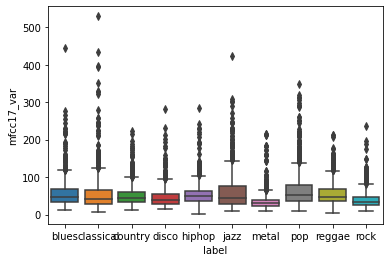

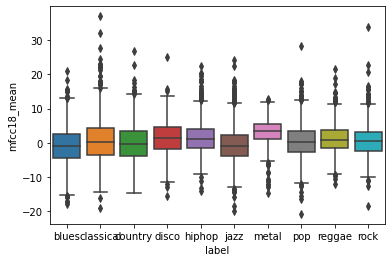

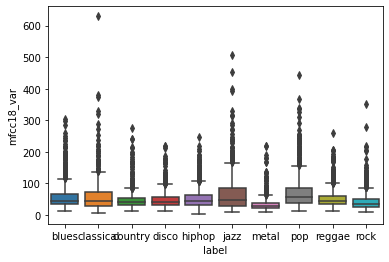

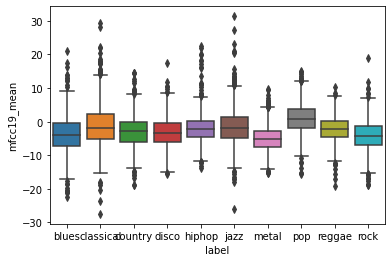

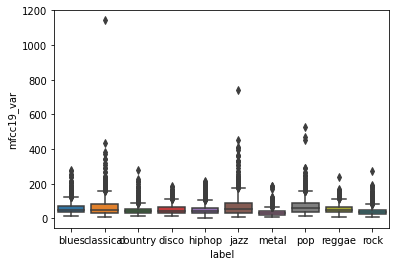

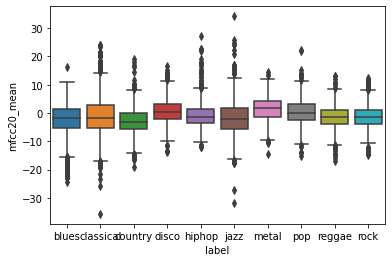

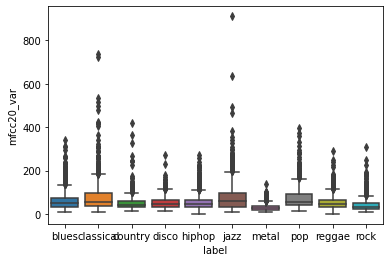

In [10]:
for element in df.columns[1:].drop('label'):
  sns.boxplot( x= 'label', y = element, data= df)
  plt.show()

Вычислим парные коэффициенты корреляции между признаками. Построим тепловую карту 

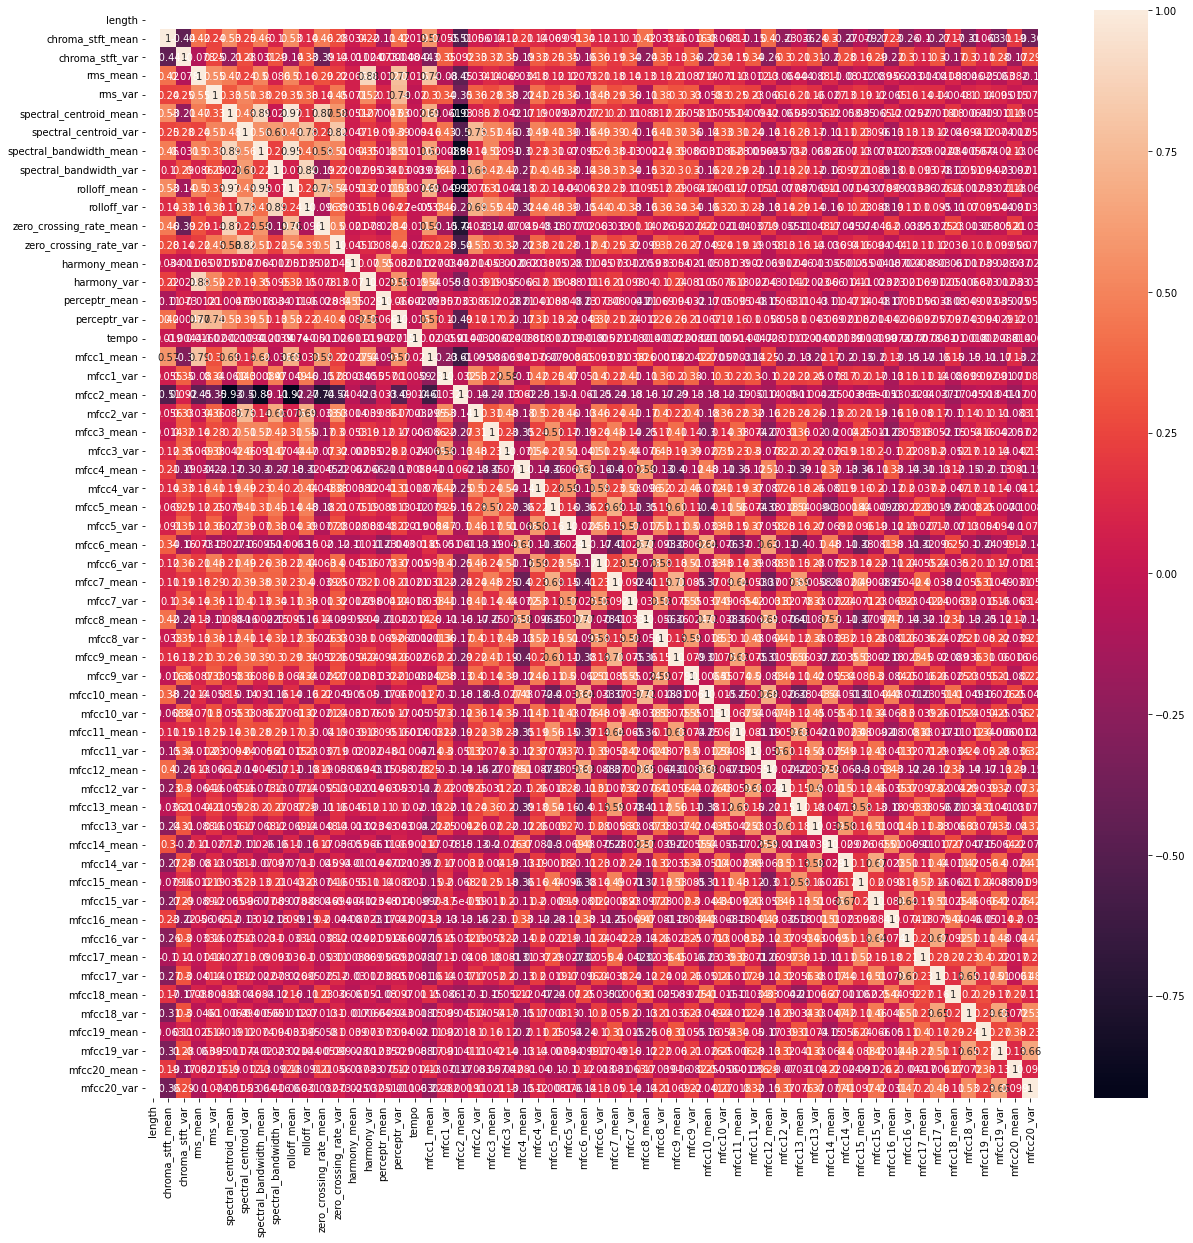

In [11]:
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, xticklabels= corr.columns.values, yticklabels= corr.columns.values,)
plt.show()

Разобьем выборку на обучающую и тестовую. Размер тестовой выборки определим 20-40% от общего объема образцов

In [12]:
x = df.drop('label', axis = 1)
x = x.drop('filename', axis = 1)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 


## KNN

Создадим модель классификатора, число соседей = 5.

Обучим модель.

Используем обученную модель для классификации на тестовой выборке.

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
y_knn_pred = knn_model.predict(x_test)
y_knn_pred

array(['rock', 'reggae', 'hiphop', ..., 'blues', 'metal', 'reggae'],
      dtype=object)

Вычислим достоверность классификатора.

Построим матрицу ошибок.

Выведем отчет о классификации

In [15]:
aсc_knn = accuracy_score(y_test, y_knn_pred)
print('accuracy of KNN is (:df) %', aсc_knn *100)

accuracy of KNN is (:df) % 26.726726726726728


[[ 51   8  27  16  11  27  21   4   7   7]
 [ 21 128   4   0   0  15  19   0   1   5]
 [ 27  11  46  24  11  20  21  10  25  15]
 [ 27   2  21  40  26   4  15  22  11  17]
 [ 21   2  17  41  40   4  13  34  29  16]
 [ 36  25  24  15   9  43  12  11   5  17]
 [ 46  31  20  20  13   8  61   1   3  14]
 [ 12   1  19  20  34  15   4  54  24   7]
 [ 23   1  28  21  23   6  12  36  52  18]
 [ 37  16  17  28  18  14  16  12  13  19]]


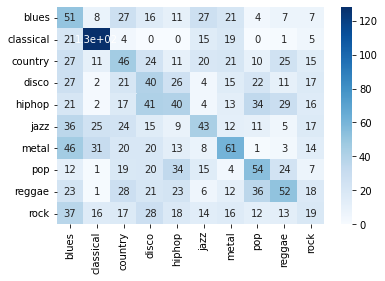

In [16]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, y_knn_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, xticklabels=genres, yticklabels=genres, cmap='Blues')

In [17]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

       blues       0.17      0.28      0.21       179
   classical       0.57      0.66      0.61       193
     country       0.21      0.22      0.21       210
       disco       0.18      0.22      0.20       185
      hiphop       0.22      0.18      0.20       217
        jazz       0.28      0.22      0.24       197
       metal       0.31      0.28      0.30       217
         pop       0.29      0.28      0.29       190
      reggae       0.31      0.24      0.27       220
        rock       0.14      0.10      0.12       190

    accuracy                           0.27      1998
   macro avg       0.27      0.27      0.26      1998
weighted avg       0.27      0.27      0.26      1998



Настройка параметров. Используем кросс-валидацию для подбора параметров модели

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score
cv_scores = []
neighbors = list(np.arange(3,10,1))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    cross_val = cross_val_score(knn, x_train, y_train, cv = 7, scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[error.index(min(error))]
knn_optimal = KNeighborsClassifier(n_neighbors= optimal_n)
knn_optimal.fit(x_train, y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test, pred)*100
print('optimal_n = ', optimal_n)
print('accuracy = ', acc)

optimal_n =  9
accuracy =  29.07907907907908


# Дерево решений

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state= 46)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
tree_model = tree.fit(x_train, y_train)

In [28]:
tree_model_pred = tree_model.predict(x_test)
tree_model_pred

array(['classical', 'disco', 'blues', ..., 'classical', 'blues', 'blues'],
      dtype=object)

In [29]:
acc_tree = accuracy_score(y_test, tree_model_pred)
acc_tree

0.3915132105684548

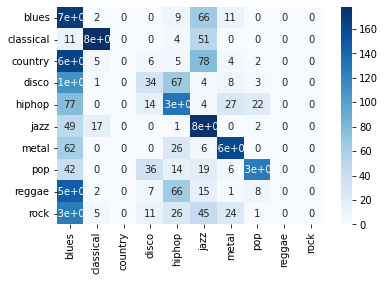

In [30]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, tree_model_pred)
sns.heatmap(conf_matrix, annot = True, xticklabels = genres, yticklabels=genres, cmap = 'Blues')

# Наивный Байес:

In [31]:
from sklearn.naive_bayes import  GaussianNB
Nb_classifier = GaussianNB()
Nb_classifier.fit(x_train, y_train)

GaussianNB()

In [32]:
Nb_classifier_pred = Nb_classifier.predict(x_test)
Nb_classifier_pred

array(['reggae', 'disco', 'country', ..., 'metal', 'metal', 'metal'],
      dtype='<U9')

In [33]:
acc_b = accuracy_score(y_test, Nb_classifier_pred)
print('accuracy of LOG reg is (:.4f) %', acc_b *100)

accuracy of LOG reg is (:.4f) % 41.43314651721377


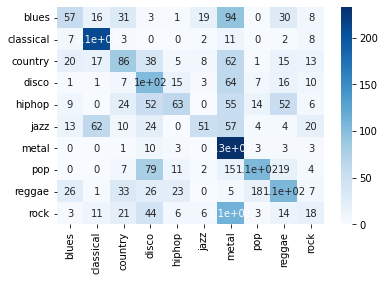

In [34]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, Nb_classifier_pred)
sns.heatmap(conf_matrix, annot = True, xticklabels = genres, yticklabels=genres, cmap = 'Blues')

Точность повысилась, но все еще очень низкая

In [35]:
print(classification_report(y_test, Nb_classifier_pred))

              precision    recall  f1-score   support

       blues       0.42      0.22      0.29       259
   classical       0.66      0.86      0.75       244
     country       0.39      0.32      0.35       265
       disco       0.27      0.45      0.34       227
      hiphop       0.50      0.23      0.31       275
        jazz       0.56      0.21      0.30       245
       metal       0.33      0.91      0.48       256
         pop       0.68      0.44      0.53       243
      reggae       0.41      0.43      0.42       246
        rock       0.19      0.08      0.11       238

    accuracy                           0.41      2498
   macro avg       0.44      0.42      0.39      2498
weighted avg       0.44      0.41      0.39      2498



In [36]:
print('accuracy of aсc_knn is (:.4f) %', aсc_knn *100)
print('accuracy of aсc_knn is (:.4f) %', aсc_knn *100)
print('accuracy of acc_tree is (:.4f) %', acc_tree *100)
print('accuracy of acc_b is (:.4f) %', acc_b *100)


accuracy of aсc_knn is (:.4f) % 26.726726726726728
accuracy of aсc_knn is (:.4f) % 26.726726726726728
accuracy of acc_tree is (:.4f) % 39.151321056845475
accuracy of acc_b is (:.4f) % 41.43314651721377


Таким образом, наиболее точной оказалась модель наивного Байеса, однако точность не превышает даже 40%. Скорее всего, это связано с тем, что исходный датасет несет слишком мало информации, так как он основывается лишь на 3-х секундах песен

### SVM

Линеный классификатор SVM

In [ ]:
svm_model = SVC(kernel= 'linear', C = 1, random_state= 46)
svm_model.fit(x_train, y_train)

In [ ]:
y_svm_pred = svm_model.predict(x_test)
y_svm_pred

In [ ]:
acc_svm = accuracy_score(y_test, y_svm_pred)
print('accuracy of KNN is (:df) %', acc_svm *100)

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, y_svm_pred)
sns.heatmap(conf_matrix, annot = True, xticklabels = genres, yticklabels=genres, cmap = 'Blues')

In [ ]:
print(classification_report(y_test, y_svm_pred))

Gridsearch Practice - нелинейный классификатор

In [ ]:
svm_rbf_model = SVC(kernel= 'rbf', C = 10, gamma = 0.1, random_state= 46)
svm_rbf_model.fit(x_train, y_train)

In [ ]:
y_svm_rbf_pred = svm_rbf_model.predict(x_test)
y_svm_rbf_pred

In [ ]:
acc_svm = accuracy_score(y_test, y_svm_rbf_pred)
acc_svm

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, y_svm_rbf_pred)
sns.heatmap(conf_matrix, annot = True, xticklabels = genres, yticklabels=genres, cmap = 'Blues')

In [ ]:
print(classification_report(y_test, y_svm_rbf_pred))

Подбор параметров GridSearchCV

In [ ]:
params_grid = {'C':[0.1, 1, 5, 10], 'gamma':[1, 0.1, 0.05, 0.001]}
grid = GridSearchCV(SVC(), params_grid, refit= True, verbose= 2)
grid.fit(x_train, y_train)

In [ ]:
grid_pred = grid.predict(x_test)

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
conf_matrix = confusion_matrix(y_test, grid_pred)
sns.heatmap(conf_matrix, annot = True, xticklabels = genres, yticklabels=genres, cmap = 'Blues')